<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework_Decay_Chain_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Radioactive decay chain

This exercise looks at a more advanced version of the simple
radioactive decay simulation from class.

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different
routes, with probabilities and half-lives thus:

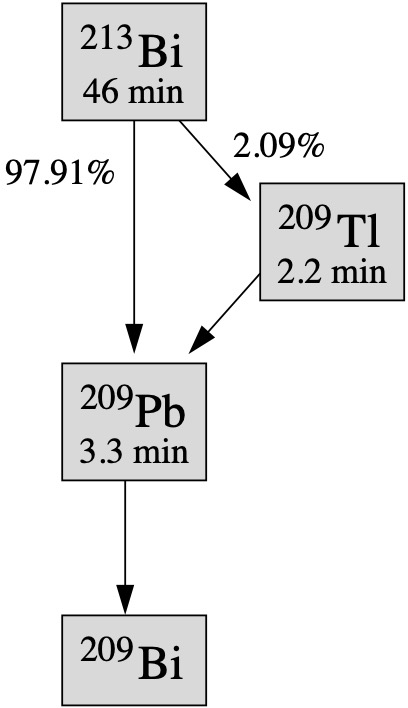

(Technically, $^{209}$Bi isn't really stable, but it has a half-life of more than $10^{19}$ years, a billion times the age of the universe, so it might as well be.)

Starting with a sample consisting of $10\,000$ atoms of $^{213}$Bi,
simulate the decay of the atoms as in class by dividing time into slices of length $\delta t=10\,$s each and on each step doing the following:

1.  For each atom of $^{209}$Pb in turn, decide at random, with the
  appropriate probability, whether it decays or not.   Count the total number that decay,
  subtract it from the number of $^{209}$Pb atoms, and add it to the number
  of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are
  subtracted from the total for $^{209}$Tl and added to the total for
  $^{209}$Pb.

3.  For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays.  Count the numbers that decay by each route
  and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top, to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for $20\,000$ seconds and make a single graph showing the four numbers as a function of time on the same axes.  As a check, you should ensure that the total number of atoms between the four isotypes is conserved.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

simulation inputs

In [ ]:
N_init_bi213 = 10000 #initial number of thallium atoms
tau_bi213 = 46.0 * 60 # half life of bi-213 in seconds
tau_ti209 = 2.2 * 60 # half life of ti-209 in seconds
tau_pb209 = 3.3 * 60 #half life of pb-209 in seconds
p_bi213_pb209 = .9791 #probability of decaying from Bi213 to Pb209
h = 10 #timestep in seconds
tmax = 20000 #Total simulation time

setup initial arrays

In [ ]:
N_bi213 = np.array([N_init_bi213])
N_ti209 = np.array([0])
N_pb209 = np.array([0])
N_bi209 = np.array([0])
time = np.arange(0.0,tmax,h)

Determine the decay prbabilities in given time for each of the isotopes for the timestep size and half life:

In [ ]:
p_bi213_decay = 1.0 - 2**(-1*h/tau_bi213)
p_pb209_decay = 1.0 - 2**(-1*h/tau_pb209)
p_ti209_decay = 1.0 - 2**(-1*h/tau_ti209)

For each timestep, determine the number of decays of each isotope.  At the end, update the number of each isotope for the next step.

In [ ]:
for i in range(len(time)-1):
  #Decays from Pb-209 to Bi-209
  decay_pb209 = 0
  for j in range(N_pb209[i]):
    if np.random.random()< p_pb209_decay:
      decay_pb209 += 1
  #Decays from Ti-209 to Pb-209 
  decay_ti209 = 0
  for j in range(N_ti209[i]):
    if np.random.random()< p_ti209_decay:
      decay_ti209 += 1
  #Decays from Bi-209 to Ti-209  and Pb-209.  Note that you need to keep track of both decays and 
  #to use a second random number to decide if it decays to Pb-209 or Ti-209 if there is a decay
  decay_bi213_ti209 = 0 #decays to Ti-209 
  decay_bi213_pb209 = 0 #decays to Pb-209
  for j in range(N_bi213[i]):
    if np.random.random() < p_bi213_decay:
      if np.random.random() < p_bi213_pb209:
        decay_bi213_pb209 += 1
      else:
        decay_bi213_ti209 += 1
  #Now that you have all the decays, add and subtract them from the respective populations
  N_bi213 = np.append(N_bi213,N_bi213[i]-decay_bi213_pb209 - decay_bi213_ti209)
  N_ti209 = np.append(N_ti209,N_ti209[i]-decay_ti209+decay_bi213_ti209)
  N_pb209 = np.append(N_pb209,N_pb209[i]-decay_pb209+decay_ti209+decay_bi213_pb209)  
  N_bi209 = np.append(N_bi209,N_bi209[i]+decay_pb209)

Plot the results

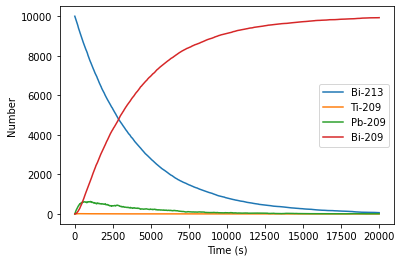

In [ ]:
plt.plot(time,N_bi213,label='Bi-213')
plt.plot(time,N_ti209,label='Ti-209')
plt.plot(time,N_pb209,label='Pb-209')
plt.plot(time,N_bi209,label='Bi-209')
plt.xlabel("Time (s)")
plt.ylabel("Number")
plt.legend()
plt.show()

# Grading (50 points)

* 10 points: Is your code commented and easy to read, with units where needed?
* 10 points: Did you properly calculate each of the decay probabilities?
* 10 points: Does your code properly updated the decay populations at each timestep?
* 15 points: Did your plot produce the correct results?
* 5 points: Is your plot labeled with units on the x-axis?